# Final Notebook 3 - Land Value Mapping

## Land Value Percent Change with and without Inflation

In this notebook, we are mapping out the percent change in land value with and without inflation. Then we compare the census tracts with the land value change with neighborhood boundary to see which neighborhood experieced the least and most average land value change from 2010 to 2020.

In [1]:
import json
import pandas as pd
import geopandas as gpd

In [2]:
#importing the cleaned up data of percent change of land value
#this data has the columns we wanted: percent change without and with inflation, and other geometry data
pctchange_landvalue = gpd.read_file('/Users/pearlliu100/Documents/GitHub/UDS-Project--Full-Team-/final_pctchange_landvalue.geojson')
pctchange_landvalue.head()

,CT20_left,pct_change_wo_inflation,pct_change_w_inflation,center_lat,center_lon,neighborhood,geometry
0,195100,0.909110,0.604294,34.10130072,-118.25959898,Silver Lake,"POLYGON ((-118.25925 34.09713, -118.25924 34.0..."
1,195400,0.914325,0.608676,34.08439266,-118.27289005,Silver Lake,"POLYGON ((-118.27208 34.09523, -118.27223 34.0..."
2,195500,1.177144,0.829532,34.08442617,-118.26054948,Echo Park,"POLYGON ((-118.25862 34.09199, -118.25866 34.0..."
3,195600,1.265756,0.903997,34.07904517,-118.26702481,Echo Park,"POLYGON ((-118.26196 34.08222, -118.26207 34.0..."
4,195710,1.692401,1.262522,34.07296112,-118.27201440,Westlake,"POLYGON ((-118.26497 34.07740, -118.26513 34.0..."


In [3]:
#take a closer look at the disribution of the data
#see how we want to customize the scale of our this dat
print(pctchange_landvalue.pct_change_w_inflation.max())
print(pctchange_landvalue.pct_change_w_inflation.min())
print(pctchange_landvalue.pct_change_w_inflation.mean())
print(pctchange_landvalue.pct_change_w_inflation.median())

42.400576568734046
-0.8370675654742541
2.3089770013215625
1.098943720217398


From the stat numbers above, we see that the mean is around 2, and max number is 42, so we think creating our own bins for scale would clearly show the differences between with and without inflation. Our scale is more clustered with smaller percentage and scatter toward bigger percentage, which is 42.

Text(0.5, 1.0, 'Land Value Percent Change with Inflation')

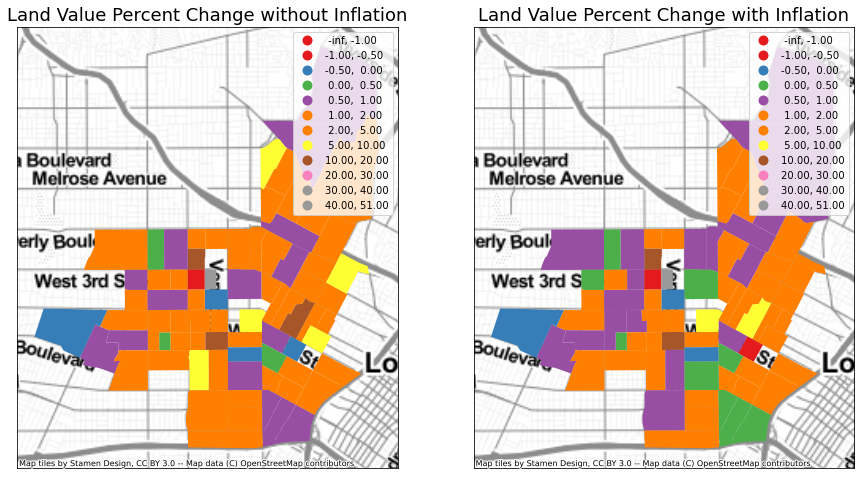

In [4]:
#map 
import contextily as ctx
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

ax1, ax2 = axs

pctchange_landvalue.to_crs('EPSG:3857').plot('pct_change_wo_inflation',
                                  cmap='Set1',
                                  scheme='user_defined',
                                  classification_kwds={'bins':[-1,-0.5,0,0.5,1,2,5,10,20,30,40,51]},
                                  legend=True, ax = ax1, alpha=1)
ctx.add_basemap(ax1, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Land Value Percent Change without Inflation', fontsize=18)


pctchange_landvalue.to_crs('EPSG:3857').plot('pct_change_w_inflation',
                                  cmap='Set1',
                                  scheme='user_defined',
                                  classification_kwds={'bins':[-1,-0.5,0,0.5,1,2,5,10,20,30,40,51]},
                                  legend=True, ax = ax2, alpha=1)
ctx.add_basemap(ax2, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Land Value Percent Change with Inflation', fontsize=18)

First, we see that there is only one census tract that is red in the without inflation map, which indicates a negative percent change with the average land value for 10 years. Then on the right we see two census tracts that are in red. This analysis shows that the inflation map has more of census tracts that are experiencing negative change in land value.

Second, most of the maps are in the orange color, which indicates that most census tracts have about 1-5% change througout 10 years. 

Thrid, there is only one census tract that is experiencing 30-51%  percent change, and this census tract is located in Koreatown, which later in the notebook we will demonstrate which neighborhood these census tracts belong in.

## Folium Map: Land Value Percent Change with Inflation and Neighborhood Boundary

In [5]:
import folium
import branca.colormap as cm

In [6]:
pctchange_landvalue['center_lat'].astype(float)
pctchange_landvalue['center_lon'].astype(float)
pctchange_landvalue['pct_change_w_inflation'].astype(float)

0     0.604294
1     0.608676
2     0.829532
3     0.903997
4     1.262522
        ...   
72    0.810215
73    1.821219
74    0.286454
75    0.336186
76    0.356696
Name: pct_change_w_inflation, Length: 77, dtype: float64

In [7]:
x_map=pctchange_landvalue.centroid.x.mean()
y_map=pctchange_landvalue.centroid.y.mean()
print(x_map,y_map)

-118.28889722582319 34.06267611314729


/var/folders/l3/q7zs5nmx6m34mrdq82pmhnn80000gn/T/ipykernel_18831/205850996.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_map=pctchange_landvalue.centroid.x.mean()
/var/folders/l3/q7zs5nmx6m34mrdq82pmhnn80000gn/T/ipykernel_18831/205850996.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_map=pctchange_landvalue.centroid.y.mean()


In [8]:
mymap = folium.Map(location=[y_map, x_map], zoom_start=11,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
mymap

myscale = (pctchange_landvalue['pct_change_w_inflation'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
folium.Choropleth(
    geo_data=pctchange_landvalue,
    name='Choropleth',
    data=pctchange_landvalue,
    columns=['neighborhood','pct_change_w_inflation'],
    key_on="feature.properties.neighborhood",
    fill_color='Blues',
    threshold_scale=myscale,
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Percent Change with Inflation',
    smooth_factor=0).add_to(mymap)


mymap

In [9]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    pctchange_landvalue,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['neighborhood','pct_change_w_inflation'],
        aliases=['Neighborhood: ','Percent Change with Inflation: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
mymap.add_child(NIL)
mymap.keep_in_front(NIL)
folium.LayerControl().add_to(mymap)
mymap

From this interactive map, we see that the colors are categorized by neighborhoods not by the scale (Percent Change with Inflation). By putting the cursor on top of the census tract we can see the name of the neighborhood and the percent change with inflation.

## Side by Side Map: Land Value Percent Change with Inflation and Neighborhood

First step is to overlay neighborhood boundary and the percentage land value data. Then side by side compare with the colored neighborhood, to see clearly which neighborhoods are experiencing the most and least land value change.

In [10]:
fivenb = gpd.read_file('/Users/pearlliu100/Documents/GitHub/UDS-Project--Full-Team-/Data Cleaning Notebooks/five_neighborhood.geojson')
fivenb.head()

,OBJECTID,name,geometry
0,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0..."
1,53,Koreatown,"POLYGON ((-118.28785 34.06182, -118.28783 34.0..."
2,74,Pico-Union,"POLYGON ((-118.28146 34.05250, -118.28094 34.0..."
3,85,Silver Lake,"POLYGON ((-118.26484 34.11282, -118.26354 34.1..."
4,27,Echo Park,"POLYGON ((-118.24487 34.09569, -118.24454 34.0..."


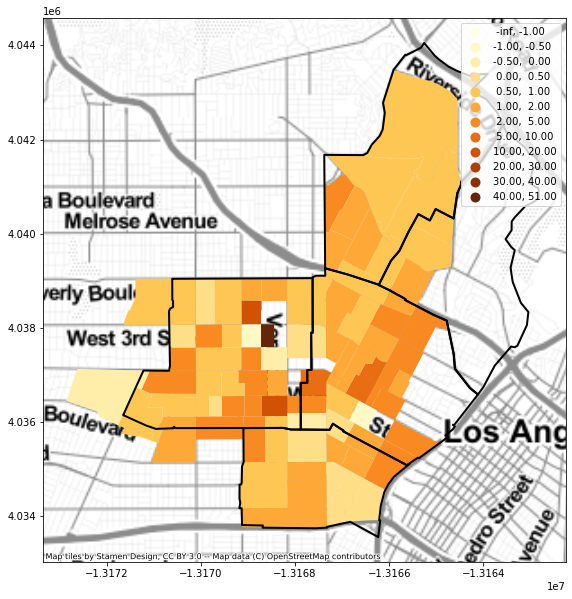

In [11]:
fig , ax = plt.subplots(figsize=(10, 10))

pctchange_landvalue.to_crs('EPSG:3857').plot('pct_change_w_inflation',
                         ax=ax,
                         cmap='YlOrBr',
                         scheme='user_defined',
                         classification_kwds={'bins':[-1,-0.5,0,0.5,1,2,5,10,20,30,40,51]},
                         legend=True, alpha=1)
fivenb.to_crs('EPSG:3857').plot(ax=ax, facecolor="none", edgecolor='black',lw=2)
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

Text(0.5, 1.0, 'City of Los Angeles Neighborhood Map')

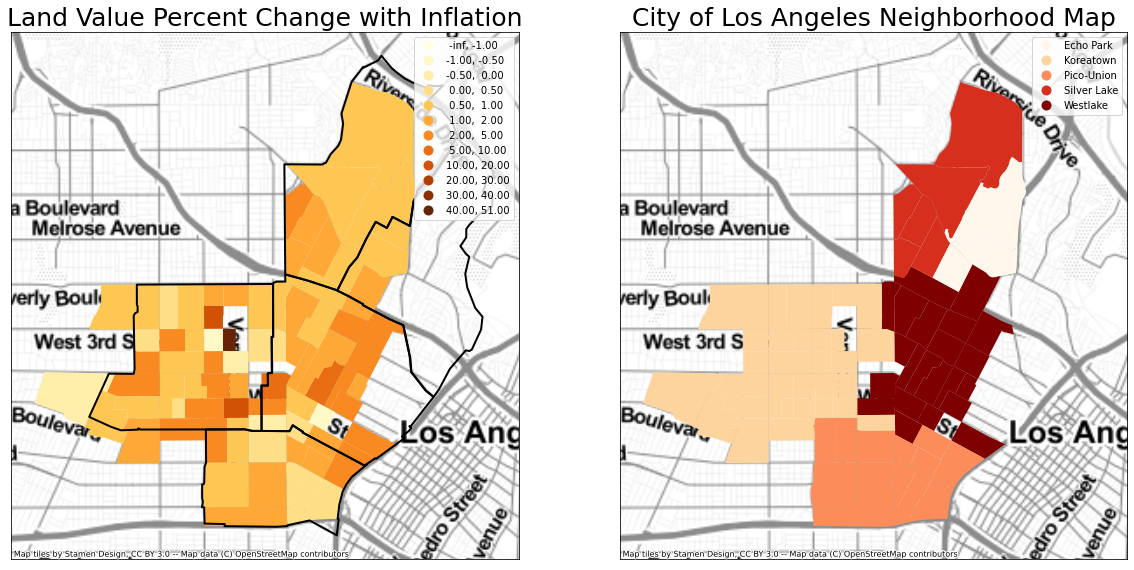

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

ax1, ax2 = axs

pctchange_landvalue.to_crs('EPSG:3857').plot(
    'pct_change_w_inflation', 
    cmap='YlOrBr',
    scheme='user_defined',
    classification_kwds={'bins':[-1,-0.5,0,0.5,1,2,5,10,20,30,40,51]},
    legend=True, ax = ax1, alpha=1)
fivenb.to_crs('EPSG:3857').plot(ax=ax1, facecolor="none", edgecolor='black',lw=2)

ctx.add_basemap(ax1, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Land Value Percent Change with Inflation', fontsize=25)


pctchange_landvalue.to_crs('EPSG:3857').plot(
    'neighborhood', legend=True, cmap='OrRd', ax = ax2, alpha=1)
ctx.add_basemap(ax2, zoom=12, source=ctx.providers.Stamen.TonerLite)

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('City of Los Angeles Neighborhood Map', fontsize=25)

From the two maps above, we observed that:
1. The percent change of land value in Koreatown varies from 40-50% to one percent or even less than one. This tells us that Koreatown has been experiencing alot of new developments. Since the change in land value has alot to do with the property on the land, with land value going up, it is an indicator that the building types have been changing.
2. The colors within Westlake is relatively darker to other neighborhoods (despite some census tracts in Koreatown). This indicate that in average, the land value has been changing the most in the 10 year period.